In [15]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from functions import *

choose a player

In [16]:
player = "L. James"

In [17]:
with open('NBA_Matches_Stats.json') as f:
    data = json.load(f)

points = []
df = pd.DataFrame()
for d in data:
    for action in d["playByPlay"]["actions"]:
        if "Shot" in action['actionType']:
            if action["playerNameI"] == player:
                df = pd.concat([df, pd.DataFrame(action, index=[0])], ignore_index=True)

df = df.rename(columns={"actionType": "Shot Type"})


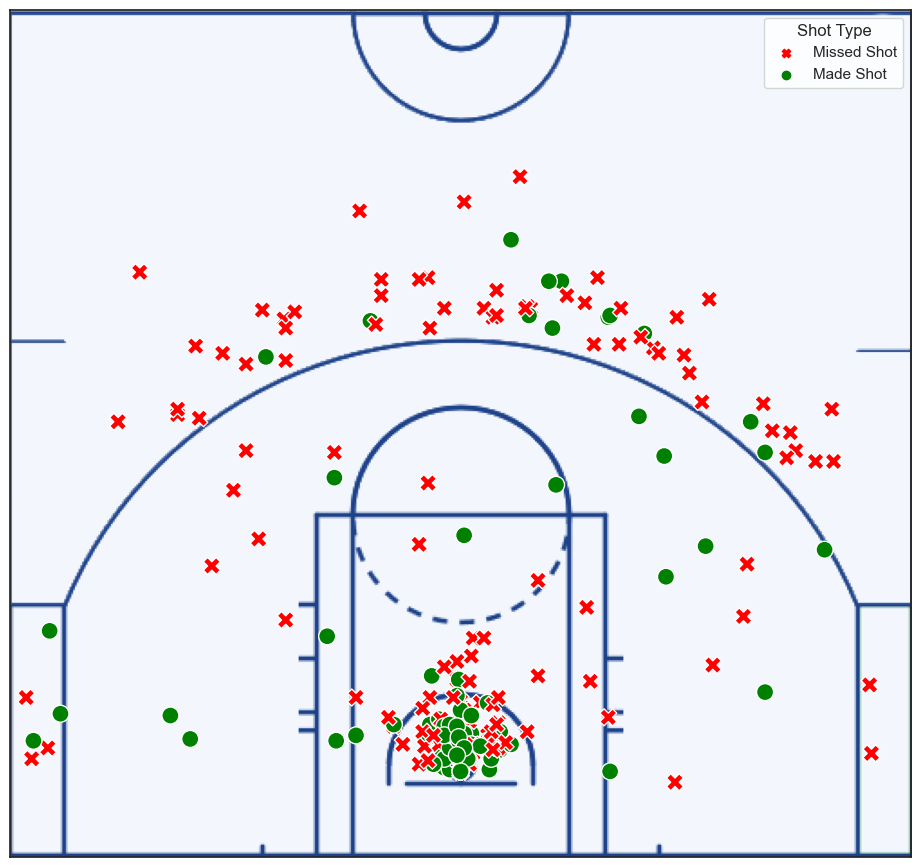

In [18]:
# change palette

img = plt.imread("court.png")
fig, ax = plt.subplots(figsize=(12, 11))
ax.imshow(img, extent=[-270, 270, -67.5, 442.5])
# plot the shots
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.scatterplot(x="xLegacy", y="yLegacy", data=df, hue="Shot Type", style="Shot Type", s=150, legend=True,
                palette=["red", "green"], style_order=["Made Shot", "Missed Shot"])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)

plt.show()

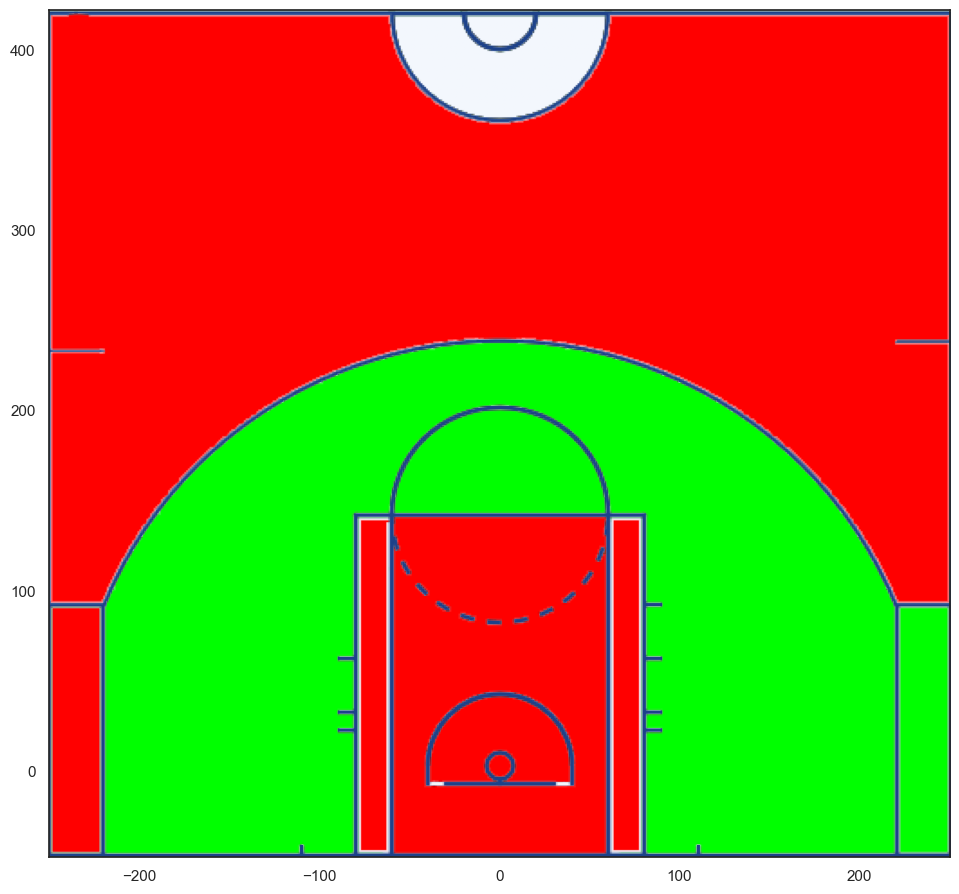

In [19]:

# add if the shot is a 3 pointer or not
df["zone"] = df.apply(lambda r: get_zone_(r), axis=1)

images = [(plt.imread("court-top.png")), plt.imread("court-bottom-left.png"),
          plt.imread("court-2points.png"), plt.imread("court-inside.png"),
          plt.imread("court-hoop.png"), plt.imread("court-bottom-right.png")]

# check the accuracy of each zones
zones = df.groupby(["zone", "Shot Type"]).agg({"Shot Type": "count"})
percent = zones["Shot Type"].unstack()["Made Shot"] / (
        zones["Shot Type"].unstack()["Missed Shot"] + zones["Shot Type"].unstack()["Made Shot"])

with open('LeagueAverage.json') as f:
    league_avg = json.load(f)

league_avg = clean_league_avg(league_avg)

fig, ax = plt.subplots(figsize=(12, 11))
img = plt.imread("court.png")
ax.imshow(img, extent=[-270, 270, -67.5, 442.5])

for id in range(len(images)):
    for i in images[id]:
        for j in i:
            if j[3] != 0:
                if (float(percent[id])) > float(league_avg[id]):
                    j[0] = j[2] = 0
                else:
                    j[2] = j[1] = 0

    ax.imshow(images[id], extent=[-270, 270, -67.5, 442.5])

plt.xlim(-250, 250)
plt.ylim(-47.5, 422.5)

plt.show()